In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/absenteeism-at-company/dados.csv


# Exploring Absenteeism Patterns: A Comprehensive Analysis of Employee Attendance Data

The objective of this analysis is to explore the dataset to uncover insights and trends related to absenteeism among employees. This includes understanding the distribution of absenteeism across different factors such as reasons, seasons, and demographic attributes. Furthermore, predictive modeling may be employed to forecast absenteeism time based on the provided features.
Understanding patterns of absenteeism is crucial for organizations aiming to optimize workforce management and employee well-being. This dataset provides a comprehensive view of various factors potentially influencing absenteeism among employees.

## Methodology

- Data Cleaning and Preparation: Addressing missing values, ensuring data consistency, and preparing variables for analysis.

- Exploratory Data Analysis (EDA): Conducting statistical summaries and visualizations to understand the distribution and relationships within the dataset.

- Correlation Analysis: Examining correlations between variables to identify potential predictors of absenteeism.

- Predictive Modeling: Building and evaluating regression models to predict absenteeism time based on selected features.

## Data Cleaning and Preparation

Data cleaning techniques such as handling missing values, removing duplicates, and correcting inconsistencies in the dataset. This initial phase is crucial as it ensures the data is accurate and reliable for subsequent analysis. Following data cleaning, I will proceed with feature engineering to derive meaningful insights from the dataset, followed by exploratory data analysis to uncover patterns and trends in employee absenteeism.
In the following sections, I will delve into detailed exploratory data analysis (EDA) to uncover various aspects of absenteeism patterns among employees. This will involve examining the distribution and relationships of different variables such as reasons for absence, transportation expenses, age demographics, and absenteeism hours. Visualizations such as histograms, box plots, and correlation matrices will be used to gain insights into the factors influencing absenteeism. Furthermore, I will employ statistical techniques to validate findings and draw conclusions that could potentially inform strategies for improving workplace attendance and productivity.

### 1. read csv data file

In [5]:
row_data = pd.read_csv('/kaggle/input/absenteeism-at-company/dados.csv')
print(row_data.head())

   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   ...  Disciplinary failure  Education  Son  \
0 

### 2. Extract data features

In [6]:
row_data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

The dataset comprises several key attributes related to employee absenteeism:

- ID: Unique identifier for each employee.
- Reason for absence: Categorized reasons (e.g., medical consultation, dental appointment) behind employee absenteeism.
- Month of absence: The month in which the absence occurred.
- Day of the week: The day of the week when the absence took place.
- Seasons: The season during which the absence occurred (e.g., winter, spring).
- Transportation expense: Cost of commuting for the employee.
- Distance from Residence to Work: Distance in kilometers between the employee's residence and workplace.
- Service time: Duration of employment at the organization.
- Age: Age of the employee.
- Workload Average/day: Average daily workload measured during the absence period.
- Hit target: Achievement target percentage for the employee.
- Disciplinary failure: Binary indicator (0 or 1) of whether there was a disciplinary failure.
- Education: Level of education attained by the employee.
- Son: Number of children the employee has.
- Social drinker: Binary indicator of whether the employee is a social drinker (0 or 1).
- Social smoker: Binary indicator of whether the employee is a social smoker (0 or 1).
- Pet: Number of pets the employee has.
- Weight: Weight of the employee.
- Height: Height of the employee.
- Body mass index: Body mass index (BMI) of the employee.
- Absenteeism time in hours: Total hours of absenteeism during the absence period.

### 3. Concise summary of DataFrame

In [3]:
row_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

This DataFrame contains 740 entries across 21 columns. It includes various features such as ID, reasons for absence, transportation details, personal attributes like age and education, and work-related metrics like workload and absenteeism time. The data types range from integer to float, with no missing values observed, making it ready for analysis and modeling tasks.

### 4. Descriptive statistics

In [5]:
row_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


This table provides a statistical summary of the dataset's numerical columns:

- count: Number of non-null values in each column.
- mean: Average value for each column.
- std: Standard deviation, indicating the spread of values.
- min: Minimum value observed in each column.
- 25%: 25th percentile, also known as the first quartile.
- 50%: Median or 50th percentile.
- 75%: 75th percentile, or third quartile.
- max: Maximum value observed in each column.

These statistics offer insights into the distribution and range of values across the dataset's numerical features.

**Correlation of Data**

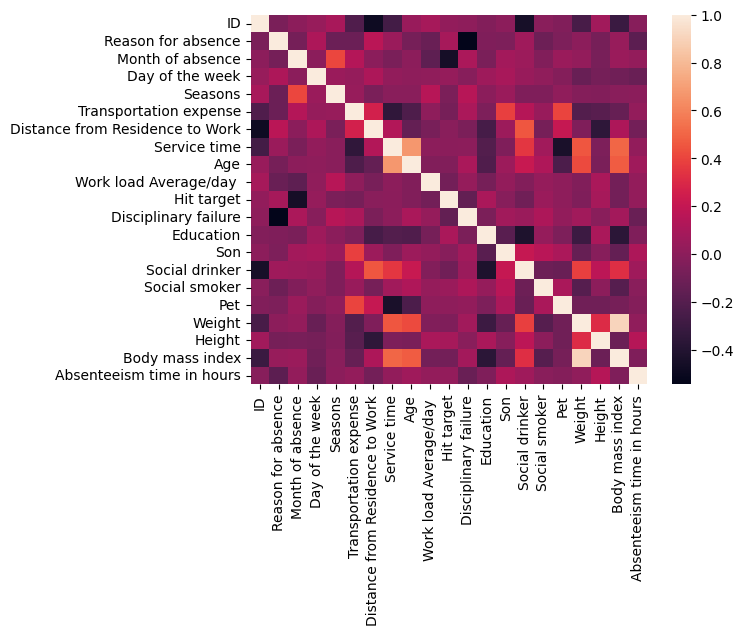

In [ ]:
import seaborn as sns
ax = sns.heatmap(row_data.corr())

### 5. Remove some unimportant columns

In [25]:
row_data['Service time'].unique()
row_data.drop(['ID','Service time','Hit target', 'Weight', 'Height'], axis=1, inplace=True)

In [26]:
row_data.isnull().sum()
df = row_data

### 6. Convert Categorical Variable to numberic with dummy

The code snippet processes categorical data from the 'Reason for absence' column by creating dummy variables using pd.get_dummies(). These dummy variables are then grouped into four categories (RfA_g1, RfA_g2, RfA_g3, RfA_g4) based on predefined ranges. Each group represents a consolidated representation of the original categorical data, which is then concatenated back into the original dataframe df. This process enables easier analysis and modeling of the categorical variable 'Reason for absence' in machine learning tasks like logistic regression.

In [27]:
dummies_RfA = pd.get_dummies(df['Reason for absence'], dtype='int', drop_first = True)
dummies_RfA

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
dummies_RfA.columns.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 22, 23, 24, 25, 26, 27, 28])

This code consolidates categorical groups derived from dummy variables for "Reason for absence" into the original DataFrame df.

In [28]:
RfA_g1 = dummies_RfA.loc[:,1:14].max(axis=1)
RfA_g2 = dummies_RfA.loc[:,15:17].max(axis=1)
RfA_g3 = dummies_RfA.loc[:,18:21].max(axis=1)
RfA_g4 = dummies_RfA.loc[:,22:].max(axis=1)

This line of code removes the column 'Reason for absence' from the DataFrame df.

In [29]:
df = pd.concat([df, RfA_g1, RfA_g2, RfA_g3,RfA_g4 ], axis=1)
df

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours,0,1,2,3
0,26,7,3,1,289,36,33,239.554,0,1,2,1,0,1,30,4,0,0,0,1
1,0,7,3,1,118,13,50,239.554,1,1,1,1,0,0,31,0,0,0,0,0
2,23,7,4,1,179,51,38,239.554,0,1,0,1,0,0,31,2,0,0,0,1
3,7,7,5,1,279,5,39,239.554,0,1,2,1,1,0,24,4,1,0,0,0
4,23,7,5,1,289,36,33,239.554,0,1,2,1,0,1,30,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,33,264.604,0,1,2,1,0,1,30,8,1,0,0,0
736,11,7,3,1,235,11,37,264.604,0,3,1,0,0,1,29,4,1,0,0,0
737,0,0,3,1,118,14,40,271.219,0,1,1,1,0,8,34,0,0,0,0,0
738,0,0,4,2,231,35,39,271.219,0,1,2,1,0,2,35,0,0,0,0,0


In [30]:
df.drop(['Reason for absence'],axis=1,inplace=True)


### 7. Reordering Feature names

In [33]:
df.columns.values

array(['Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work', 'Age',
       'Work load Average/day ', 'Disciplinary failure', 'Education',
       'Son', 'Social drinker', 'Social smoker', 'Pet', 'Body mass index',
       'Absenteeism time in hours', 0, 1, 2, 3], dtype=object)

In [34]:
df.columns = ['Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work', 'Age',
       'Work load Average/day ', 'Disciplinary failure', 'Education',
       'Son', 'Social drinker', 'Social smoker', 'Pet', 'Body mass index',
       'Absenteeism time in hours', 'reason_1', 'reason_2', 'reason_3', 'reason_4']
df.head(5)

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours,reason_1,reason_2,reason_3,reason_4
0,7,3,1,289,36,33,239.554,0,1,2,1,0,1,30,4,0,0,0,1
1,7,3,1,118,13,50,239.554,1,1,1,1,0,0,31,0,0,0,0,0
2,7,4,1,179,51,38,239.554,0,1,0,1,0,0,31,2,0,0,0,1
3,7,5,1,279,5,39,239.554,0,1,2,1,1,0,24,4,1,0,0,0
4,7,5,1,289,36,33,239.554,0,1,2,1,0,1,30,2,0,0,0,1


In [35]:
Columns_name_ordered = [ 'reason_1', 'reason_2', 'reason_3', 'reason_4','Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work', 'Age',
       'Work load Average/day ', 'Disciplinary failure', 'Education',
       'Son', 'Social drinker', 'Social smoker', 'Pet', 'Body mass index',
       'Absenteeism time in hours']
df = df[Columns_name_ordered]

In [36]:
df

,reason_1,reason_2,reason_3,reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
0,0,0,0,1,7,3,1,289,36,33,239.554,0,1,2,1,0,1,30,4
1,0,0,0,0,7,3,1,118,13,50,239.554,1,1,1,1,0,0,31,0
2,0,0,0,1,7,4,1,179,51,38,239.554,0,1,0,1,0,0,31,2
3,1,0,0,0,7,5,1,279,5,39,239.554,0,1,2,1,1,0,24,4
4,0,0,0,1,7,5,1,289,36,33,239.554,0,1,2,1,0,1,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,1,0,0,0,7,3,1,289,36,33,264.604,0,1,2,1,0,1,30,8
736,1,0,0,0,7,3,1,235,11,37,264.604,0,3,1,0,0,1,29,4
737,0,0,0,0,0,3,1,118,14,40,271.219,0,1,1,1,0,8,34,0
738,0,0,0,0,0,4,2,231,35,39,271.219,0,1,2,1,0,2,35,0


### 8. Edit Education Column

Based on the result of df['Education'].value_counts(), we observe that the majority of employees (611 out of 740) fall under education level 1. This prevalence of a single category can skew predictive models or analyses that rely on education as a factor. By binarizing the 'Education' column to 0 and 1, where:

- 0 represents education level 1 (typically lower education qualifications),
- 1 represents education levels 2, 3, and 4 (typically higher education qualifications),
we simplify the representation of educational backgrounds. This transformation helps balance the representation of education levels in the dataset, making it more suitable for modeling purposes by ensuring each category contributes proportionally to the analysis. Thus, we enhance the model's ability to effectively interpret the influence of education on various outcomes such as absenteeism, performance, or other workplace-related factors.

In [40]:
df['Education'].value_counts()

Education
1    611
3     79
2     46
4      4
Name: count, dtype: int64

In [41]:
df['Education'] = df['Education'].map({1:0,2:1,3:1,4:1})
df['Education'].value_counts()

Education
0    611
1    129
Name: count, dtype: int64

In [42]:
df.columns = ['reason_1', 'reason_2', 'reason_3', 'reason_4','Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work', 'Age',
       'Work load Average/day ', 'Disciplinary failure', 'Education',
       'Children', 'Social drinker', 'Social smoker', 'Pet', 'Body mass index',
       'Absenteeism time in hours']

### 9. Edit Absenteeism time in hours Feature

This line of code converts the 'Absenteeism time in hours' column into a binary variable. Each value in this column is mapped based on whether it is less than the median value of 'Absenteeism time in hours'. If a value is less than the median, it is mapped to 0, indicating lower absenteeism. If it is equal to or greater than the median, it is mapped to 1, indicating higher absenteeism. This transformation simplifies the variable for classification or analysis tasks where distinguishing between low and high absenteeism levels is important.

In [44]:
df['Absenteeism time in hours'] = df['Absenteeism time in hours'].map(lambda x: 0 if x < df['Absenteeism time in hours'].median() else 1)
df['Absenteeism time in hours']

0      1
1      0
2      0
3      1
4      0
      ..
735    1
736    1
737    0
738    0
739    0
Name: Absenteeism time in hours, Length: 740, dtype: int64

### 10. Seperate target Feature

In [45]:
target = df['Absenteeism time in hours']
df.drop(['Absenteeism time in hours'],axis=1,inplace=True)

**Create Checkpoint**

In [54]:
unscaled_inputs = df
unscaled_inputs

,reason_1,reason_2,reason_3,reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Disciplinary failure,Education,Children,Social drinker,Social smoker,Pet,Body mass index
0,0,0,0,1,7,3,1,289,36,33,239.554,0,0,2,1,0,1,30
1,0,0,0,0,7,3,1,118,13,50,239.554,1,0,1,1,0,0,31
2,0,0,0,1,7,4,1,179,51,38,239.554,0,0,0,1,0,0,31
3,1,0,0,0,7,5,1,279,5,39,239.554,0,0,2,1,1,0,24
4,0,0,0,1,7,5,1,289,36,33,239.554,0,0,2,1,0,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,1,0,0,0,7,3,1,289,36,33,264.604,0,0,2,1,0,1,30
736,1,0,0,0,7,3,1,235,11,37,264.604,0,1,1,0,0,1,29
737,0,0,0,0,0,3,1,118,14,40,271.219,0,0,1,1,0,8,34
738,0,0,0,0,0,4,2,231,35,39,271.219,0,0,2,1,0,2,35


### 11. Standarzation

When working with machine learning models, it is often necessary to scale numerical features to ensure they contribute equally to the model's performance. The following is an implementation of a custom scaler in Python using the sklearn package, which provides enhanced flexibility and control over the feature scaling process.

In the following code, a custom scaler class is implemented to extend the functionality of the StandardScaler from the sklearn.preprocessing module. This custom scaler is designed to handle specific columns of a dataset for feature scaling, ensuring that the scaling process is customized and integrated seamlessly into the data preprocessing pipeline.
This custom scaler class ensures that only the specified columns are scaled, allowing more control over the preprocessing steps. It integrates with the broader scikit-learn pipeline, making it a flexible tool for data transformation in machine learning workflows.

In [50]:
# import the libraries needed to create the Custom Scaler
# note that all of them are a part of the sklearn package
# moreover, one of them is actually the StandardScaler module, 
# so you can imagine that the Custom Scaler is build on it

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

# create the Custom Scaler class


class CustomScaler(BaseEstimator,TransformerMixin): 
    
    # init or what information we need to declare a CustomScaler object
    # and what is calculated/declared as we do
    
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        
        # scaler is nothing but a Standard Scaler object
        self.scaler = StandardScaler()
        # with some columns 'twist'
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    
    # the fit method, which, again based on StandardScale
    
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    # the transform method which does the actual scaling

    def transform(self, X, y=None, copy=None):
        
        # record the initial order of the columns
        init_col_order = X.columns
        
        # scale all features that you chose when creating the instance of the class
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        
        # declare a variable containing all information that was not scaled
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        
        # return a data frame which contains all scaled features and all 'not scaled' features
        # use the original order (that you recorded in the beginning)
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]    
    

In [56]:
columns_to_omit = ['reason_1', 'reason_2', 'reason_3', 'reason_4','Education']
columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]
absenteeism_scaler = CustomScaler(columns_to_scale)
absenteeism_scaler.fit(unscaled_inputs)
scaled_inputs = absenteeism_scaler.transform(unscaled_inputs)
scaled_inputs

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,reason_1,reason_2,reason_3,reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Disciplinary failure,Education,Children,Social drinker,Social smoker,Pet,Body mass index
0,0,0,0,1,0.196763,-0.643947,-1.390175,1.011408,0.429556,-0.532868,-0.818212,-0.239046,0,0.893723,0.872872,-0.280566,0.192850,0.775932
1,0,0,0,0,0.196763,-0.643947,-1.390175,-1.544379,-1.121694,2.092860,-0.818212,4.183300,0,-0.017234,0.872872,-0.280566,-0.566240,1.009438
2,0,0,0,1,0.196763,0.059924,-1.390175,-0.632665,1.441240,0.239405,-0.818212,-0.239046,0,-0.928191,0.872872,-0.280566,-0.566240,1.009438
3,1,0,0,0,0.196763,0.763796,-1.390175,0.861947,-1.661258,0.393859,-0.818212,-0.239046,0,0.893723,0.872872,3.564226,-0.566240,-0.625100
4,0,0,0,1,0.196763,0.763796,-1.390175,1.011408,0.429556,-0.532868,-0.818212,-0.239046,0,0.893723,0.872872,-0.280566,0.192850,0.775932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,1,0,0,0,0.196763,-0.643947,-1.390175,1.011408,0.429556,-0.532868,-0.176427,-0.239046,0,0.893723,0.872872,-0.280566,0.192850,0.775932
736,1,0,0,0,0.196763,-0.643947,-1.390175,0.204318,-1.256585,0.084950,-0.176427,-0.239046,1,-0.017234,-1.145644,-0.280566,0.192850,0.542427
737,0,0,0,0,-1.841698,-0.643947,-1.390175,-1.544379,-1.054248,0.548314,-0.006949,-0.239046,0,-0.017234,0.872872,-0.280566,5.506478,1.709954
738,0,0,0,0,-1.841698,0.059924,-0.490149,0.144533,0.362110,0.393859,-0.006949,-0.239046,0,0.893723,0.872872,-0.280566,0.951940,1.943459


### 12. Create LogisticRegression Model

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(scaled_inputs,target, train_size=0.8,random_state=20)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


model = LogisticRegression()
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.7432432432432432

In [77]:
model_ouputs =  model.predict(x_train)

sum(model_ouputs==y_train)/len(y_train)

0.7432432432432432

**Features and Model Coefficients**

In [79]:
feature_name = unscaled_inputs.columns.values

summary_output = pd.DataFrame({'feature_name':feature_name})
summary_output['coeff'] = np.transpose(model.coef_)
summary_output

,feature_name,coeff
0,reason_1,1.081978
1,reason_2,0.161470
2,reason_3,1.217944
3,reason_4,-0.674950
4,Month of absence,0.133361
5,Day of the week,-0.070235
6,Seasons,-0.117931
7,Transportation expense,0.350451
8,Distance from Residence to Work,0.031989
9,Age,-0.199109


In [80]:
summary_output.index = summary_output.index +1
summary_output

,feature_name,coeff
1,reason_1,1.081978
2,reason_2,0.161470
3,reason_3,1.217944
4,reason_4,-0.674950
5,Month of absence,0.133361
6,Day of the week,-0.070235
7,Seasons,-0.117931
8,Transportation expense,0.350451
9,Distance from Residence to Work,0.031989
10,Age,-0.199109


In [86]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.500507
         Iterations 10
                               Logit Regression Results                              
Dep. Variable:     Absenteeism time in hours   No. Observations:                  592
Model:                                 Logit   Df Residuals:                      574
Method:                                  MLE   Df Model:                           17
Date:                       Tue, 04 Jun 2024   Pseudo R-squ.:                  0.2425
Time:                               14:13:23   Log-Likelihood:                -296.30
converged:                              True   LL-Null:                       -391.13
Covariance Type:                   nonrobust   LLR p-value:                 3.394e-31
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
reason_1 

In [90]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
pred = model.predict(x_train)
conf_mat = confusion_matrix(y_train, model.predict(x_train))
print('Precision', conf_mat[0, 0] / sum(conf_mat[:, 0]))
print('Recall', conf_mat[0, 0] / sum(conf_mat[0, :]))
print('Specificity', conf_mat[1, 1] / sum(conf_mat[1, :]))
precision_recall_fscore_support(list(y_train.values), list(model.predict(x_train)))

Precision 0.6994219653179191
Recall 0.5475113122171946
Specificity 0.8598382749326146


(array([0.69942197, 0.76133652]),
 array([0.54751131, 0.85983827]),
 array([0.6142132 , 0.80759494]),
 array([221, 371]))

In [84]:
summary_output.sort_values(by='coeff',ascending=False)

,feature_name,coeff
3,reason_3,1.217944
1,reason_1,1.081978
14,Children,0.447283
8,Transportation expense,0.350451
15,Social drinker,0.256290
18,Body mass index,0.223745
2,reason_2,0.161470
5,Month of absence,0.133361
13,Education,0.047732
16,Social smoker,0.039842


In [95]:
summary_output['Odds_ratio'] = np.exp(summary_output.coeff)
summary_output.sort_values('Odds_ratio', ascending=False)


,feature_name,coeff,Odds_ratio
3,reason_3,1.217944,3.380230
1,reason_1,1.081978,2.950510
14,Children,0.447283,1.564056
8,Transportation expense,0.350451,1.419707
15,Social drinker,0.256290,1.292127
18,Body mass index,0.223745,1.250753
2,reason_2,0.161470,1.175238
5,Month of absence,0.133361,1.142663
13,Education,0.047732,1.048889
16,Social smoker,0.039842,1.040646
